**Problem Statement:**
*Compare performance between shallow (1 hidden layer) and deep (3+ hidden layers) neural networks using MNIST.*

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [7]:
# Step 1: Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

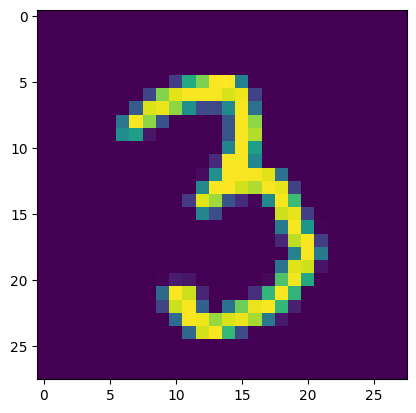

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[30000])

In [10]:
# make the values of X_traun and X_test between 0 to 1, divided by 255
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#to_categorical() -> converts numeric labels (0–9) into one-hot vectors.
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [11]:
# build shallow ANN model
shallow_model = Sequential()

shallow_model.add(Flatten(input_shape =(28, 28)))
shallow_model.add(Dense(units=128, activation='relu'))
shallow_model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
shallow_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# build deep ANN model
deep_model = Sequential()

deep_model.add(Flatten(input_shape =(28, 28)))
deep_model.add(Dense(units=512, activation='relu'))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(units=256, activation='relu'))
deep_model.add(Dropout(0.3))
deep_model.add(Dense(units=128, activation='relu'))
deep_model.add(Dense(units=10, activation='softmax'))

In [14]:
deep_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history_shallow = shallow_model.fit (X_train, y_train_cat,
  epochs =10,
  batch_size =128,
  validation_split =0.2,
  verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8161 - loss: 0.6817 - val_accuracy: 0.9448 - val_loss: 0.2040
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9444 - loss: 0.1933 - val_accuracy: 0.9526 - val_loss: 0.1692
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9613 - loss: 0.1373 - val_accuracy: 0.9635 - val_loss: 0.1256
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9708 - loss: 0.1059 - val_accuracy: 0.9662 - val_loss: 0.1157
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9767 - loss: 0.0830 - val_accuracy: 0.9687 - val_loss: 0.1033
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9805 - loss: 0.0692 - val_accuracy: 0.9724 - val_loss: 0.0962
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9839 - loss: 0.0598 - val_accuracy: 0.9711 - val_loss: 0.0925
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0468 - val_accuracy: 0.

In [17]:
history_deep = deep_model.fit (X_train, y_train_cat,
  epochs =10,
  batch_size =128,
  validation_split =0.2,
  verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8156 - loss: 0.5957 - val_accuracy: 0.9595 - val_loss: 0.1323
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9588 - loss: 0.1328 - val_accuracy: 0.9708 - val_loss: 0.0982
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9726 - loss: 0.0853 - val_accuracy: 0.9744 - val_loss: 0.0855
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9781 - loss: 0.0714 - val_accuracy: 0.9746 - val_loss: 0.0857
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9809 - loss: 0.0587 - val_accuracy: 0.9771 - val_loss: 0.0772
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9830 - loss: 0.0513 - val_accuracy: 0.9763 - val_loss: 0.0862
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9852 - loss: 0.0456 - val_accuracy: 0.9791 - val_loss: 0.0783
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9879 - loss: 0.0366 - val_accu

In [19]:
# Step 5: Evaluate on test data
test_loss_shallow, test_acc_shallow = shallow_model.evaluate(X_test, y_test_cat , verbose =0)
print (f"Test Accuracy : { test_acc_shallow:.4f}")

Test Accuracy : 0.9743


In [21]:
# Step 5: Evaluate on test data
test_loss_deep, test_acc_deep = shallow_model.evaluate(X_test, y_test_cat , verbose =0)
print (f"Test Accuracy : { test_acc_deep:.4f}")

Test Accuracy : 0.9743


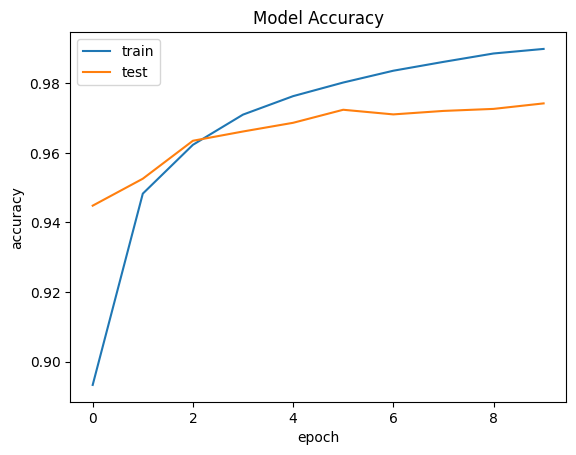

In [22]:
import matplotlib.pyplot as plt

plt.plot(history_shallow.history['accuracy'])
plt.plot(history_shallow.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

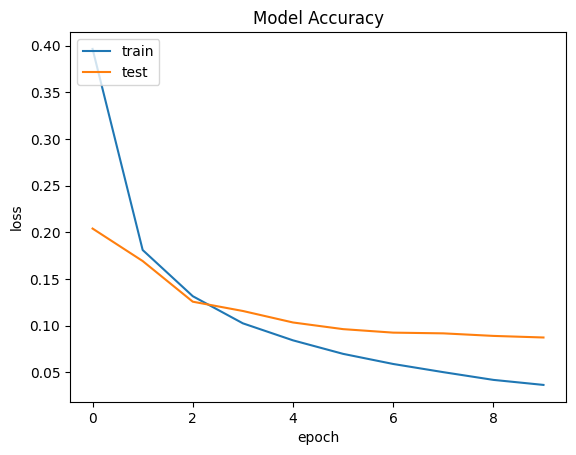

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_shallow.history['loss'])
plt.plot(history_shallow.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

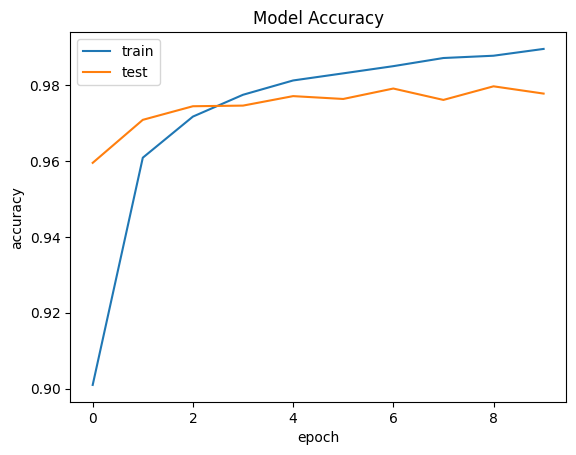

In [24]:
import matplotlib.pyplot as plt

plt.plot(history_deep.history['accuracy'])
plt.plot(history_deep.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

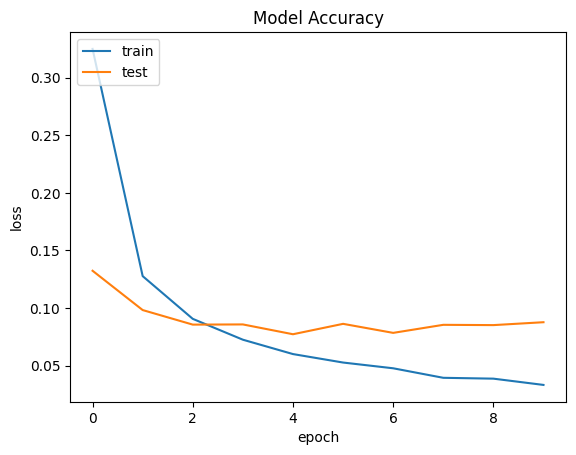

In [25]:
import matplotlib.pyplot as plt

plt.plot(history_deep.history['loss'])
plt.plot(history_deep.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()